<img src="https://github.com/Rubyw123/TMDB-Revenue-Prediction/blob/master/tmdb.png?raw=1" align="center">

<h2 align="center">Box Office Predictor: Leveraging Twitter/Reddit and Movie Data</h2>



- Introduction and Motivation
- Data Source
- Projejct Objective
- Loading the Data and Importing Libraries
- Gathering Data
- Exploratory Data Analysis
- Featured Engineering
- Conclusion


## <font color='skyblue'>Introduction</font>

In a world where the film industry generates billions of dollars in revenue, predicting box office success has become a paramount concern for movie studios and industry stakeholders.

Our goal is to develop a powerful box office predictor that leverages data-driven techniques to forecast movie revenue in a somewhat accurate way.

Accurate box office predictions assist stakeholders, including film studios, distributors, and investors, in making informed decisions regarding marketing strategies, resource allocation, and financial investments.

## <font color='skyblue'>Data Set</font>

- Credits: We have refered and modifed the data files and notebooks about the machine learning model from Kaggle
1. https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset 
2. https://www.kaggle.com/datasets/akshaypawar7/millions-of-movies
3. https://www.kaggle.com/competitions/tmdb-box-office-prediction



- The Movie Database (TMDb) API:
Main source of new coming dataset.
Provides up-to-date information on movies, including details like genre, cast, budget, and ratings,etc.
- IMDb Dataset API:
Used to fill out missing data in our dataset.
Enhances the completeness and accuracy of movie information.
- Kaggle Movie Dataset:
Main source of training datasets. These files contain metadata for more than 700,000 movies listed in the TMDB Dataset. The dataset Update daily to ensure updated movies dataset. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages, reviews, recommendations.
Provides a diverse range of movie-related datasets for machine learning model development and training.

- Twitter and Reddit APIs
Main source of high volume of data
Provides a vast amount of feedback and real-time data related to movies, casts, and directors.
Provides a platform for in-depth discussions and community opinions and offers a broader perspective on audience attitudes and sentiments.



## <font color='skyblue'>Project Objective</font>

Our goal is to develop a powerful box office prediction model that leverages data-driven techniques to forecast movie revenue and create the website to deploy the model and to display the visualizations for more insights.

The secondary goal is to practice skills data wrangling, data visualization, Random forest, Linear Regression,LGB boost, GB regressor

## <font color='skyblue'>Project Methodlogy</font>


1. Incorporate relevant features from movies datasets:
- Movie genres
- Cast
- Director
- Budget
- Revenue 
- Votes rating
- Runtime
- etc.
2. Utilize sentiment analysis from Twitter and Reddit for comprehensive audience attitudes toward movies,casts and directors.
3. Train machine learning models using the selected features to predict box office performance.
4. Evaluate model performance and select the best-performing features and models.
5. Create an ensemble model by combining the selected models to enhance prediction accuracy.
6. Develop and deploy a user-friendly website to allow users to input movie information and generate box office predictions.



This project has 4 high-level steps:

* Step 1: Data acquisition - this involves extracting data from the TMDB dataset.

* Step 2: Data exploratory analysis and feature engineering - this step involves exploring and visualizing the data to gain insights within and between variables. New features may also be added in this step.

* Step 3: Modeling experiments - this step involves designing and conducting a set of experiments to evaluate performance, select a machine learning method, and compare and select features selection approach.

* Step 4: Final evaluation - this involves evaluating the model on the validation set using R Square to determine its final performance.

## <font color='skyblue'>Loading the Data and Importing Libraries</font>

In [1]:
!python -m pip install eli5
!python -m pip install matplotlib
!python -m pip install seaborn
!python -m pip install wordcloud
!python -m pip install nltk 
!python -m pip install plotly
!python -m pip install xgboost
!python -m pip install lightgbm
!python -m pip install nbformat
!python -m pip install ipython 

In [2]:
import numpy as np
import pandas as pd
import sklearn
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn import model_selection # for splitting into train and test
import json
import ast
from urllib.request import urlopen
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import eli5
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
print('Libraries have been imported.')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hongj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Libraries imported..


## <font color='skyblue'>**Gathering Data**</font>

In [3]:
# If reading it direcly from the local folder
# loading the data set
# df = pd.read_csv("data_output.csv", dtype={'id': 'object'})
# #displaying top 5 data set
# df.head()
import pandas as pd
import psycopg2
from sqlalchemy import create_engine

# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    host="34.30.45.126",
    port=5432,
    database="finalproject",
    user="postgres",
    password="teamrocket"
)

# Create a SQLAlchemy engine
engine = create_engine('postgresql+psycopg2://', creator=lambda: conn)

# Define the table names for the data
movie_table_name = "movie_merged_data"

# Read data from the table as a DataFrame
with engine.connect() as con:
    df = pd.read_sql_table(movie_table_name, con=con)

# Display the top 5 rows of the DataFrame
df.head()

,adult,belongs_to_collection,homepage,id,imdb_id,production_countries,spoken_languages,video,keywords,backdrop_path,recommendations,budget,genres,original_language,original_title,overview,popularity,poster_path,production_companies,release_date,revenue,runtime,status,tagline,vote_average,vote_count,cast,director,New_status,rating,Top Cast,twitter_movie_score,twitter_cast_average_score,twitter_director_score,reddit_movie_score,reddit_cast_average_score,reddit_director_score
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",http://toystory.disney.com/toy-story,862,tt0114709,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",false,martial arts-jealousy-friendship-bullying-elem...,/lxD5ak7BOoinRNehOCA85CQ8ubr.jpg,863-10193-585-12-9806-2062-14160-920-808-10681...,30000000.0,"[""Animation"", ""Adventure"", ""Family"", ""Comedy""]",en,Toy Story,Led by Woody Andy's toys live happily in his r...,111.892,/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg,Pixar,1995-10-30,373554033.0,81.0,Released,NaN,7.966,16430.0,Tom Hanks-Tim Allen-Don Rickles-Jim Varney-Wal...,John Lasseter,False,NaN,"[""Tom Hanks"", "" \""Tim Allen"", "" \""Don Rickles""...",0.0,0.04449719464825205,0.3129770992366412,0.4369369369369369,0.5351854283457296,0.2815533980582524
1,False,NaN,NaN,8844,tt0113497,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",false,giant insect-board game-jungle-disappearance-r...,/pYw10zrqfkdm3yD9JTO6vEGQhKy.jpg,1593-788-879-771-854-772-118-353486-310-18360-...,65000000.0,"[""Adventure"", ""Fantasy"", ""Family""]",en,Jumanji,When siblings Judy and Peter discover an encha...,13.68,/vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg,TriStar Pictures-PolyGram Filmed Entertainment...,1995-12-15,262821940.0,104.0,Released,Roll the dice and unleash the excitement!,7.237,9437.0,Robin Williams-Kirsten Dunst-Bradley Pierce-Bo...,Joe Johnston,False,NaN,"[""Robin Williams"", "" \""Kirsten Dunst"", "" \""Bra...",0.0,0.048193431657437356,0.2362204724409449,0.4322250639386189,0.44012869139335536,0.7087378640776699
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,15602,tt0113228,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",false,fishing-halloween-sequel-old man-best friend-w...,/1J4Z7VhdAgtdd97nCxY7dcBpjGT.jpg,11520-12139-5825-951-11846-9340-620-329-24428,25000000.0,"[""Romance"", ""Comedy""]",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.879,/1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg,Lancaster Gate-Warner Bros. Pictures,1995-12-22,71500000.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,6.5,324.0,Walter Matthau-Jack Lemmon-Ann-Margret-Sophia ...,Howard Deutch,False,NaN,"[""Walter Matthau"", "" \""Jack Lemmon"", "" \""Ann"",...",0.0,0.4810344827586207,0.5,0.32142857142857145,0.532526386212268,0.8421052631578947
3,False,NaN,NaN,31357,tt0114885,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",false,based on novel or book-interracial relationshi...,/jZjoEKXMTDoZAGdkjhAdJaKtXSN.jpg,NaN,16000000.0,"[""Comedy"", ""Drama"", ""Romance""]",en,Waiting to Exhale,Cheated on mistreated and stepped on the women...,14.013,/4uw6HKq4vlhrSVp0zkgd4zCy4Pf.jpg,20th Century Fox,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,6.3,128.0,Whitney Houston-Angela Bassett-Loretta Devine-...,Forest Whitaker,False,NaN,"[""Whitney Houston"", "" \""Angela Bassett"", "" \""L...",0.0,0.4786855832807257,-0.5529322162985529,0.5666666666666667,0.45217120917153364,0.5964912280701754
4,False,NaN,NaN,10858,tt0113987,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",false,washington dc usa-usa president-1970s-presiden...,/zAaFQHZV23SJgSwRBvW5PeD219H.jpg,820-88794-614934-762504,44000000.0,"[""Drama"", ""History""]",en,Nixon,A look at President Richard M. Nixon—a man car...,9.483,/cz2MTGr2wpDZLirgV2r

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16520 entries, 0 to 16519
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   adult                       16520 non-null  object
 1   belongs_to_collection       16510 non-null  object
 2   homepage                    16520 non-null  object
 3   id                          16520 non-null  object
 4   imdb_id                     16520 non-null  object
 5   production_countries        16520 non-null  object
 6   spoken_languages            16520 non-null  object
 7   video                       16520 non-null  object
 8   keywords                    16520 non-null  object
 9   backdrop_path               16520 non-null  object
 10  recommendations             16520 non-null  object
 11  budget                      16512 non-null  object
 12  genres                      16520 non-null  object
 13  original_language           16520 non-null  ob

In [5]:
# get number of rows and columns
df.shape

(16520, 37)

In [6]:
# Change all the values to their correct formats
df['rating'] = pd.to_numeric(df['rating'],errors = 'coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'],errors = 'coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'],errors = 'coerce')
df['runtime'] = pd.to_numeric(df['runtime'],errors = 'coerce')
df['budget'] = pd.to_numeric(df['budget'],errors = 'coerce')
df['popularity'] = pd.to_numeric(df['popularity'],errors = 'coerce')
df['revenue'] = pd.to_numeric(df['revenue'],errors = 'coerce')

df['twitter_movie_score'] = pd.to_numeric(df['twitter_movie_score'],errors = 'coerce')
df['twitter_cast_average_score'] = pd.to_numeric(df['twitter_cast_average_score'],errors = 'coerce')
df['twitter_director_score'] = pd.to_numeric(df['twitter_director_score'],errors = 'coerce')
df['reddit_movie_score'] = pd.to_numeric(df['reddit_movie_score'],errors = 'coerce')
df['reddit_cast_average_score'] = pd.to_numeric(df['reddit_cast_average_score'],errors = 'coerce')
df['reddit_director_score'] = pd.to_numeric(df['reddit_director_score'],errors = 'coerce')

df['release_date'] = df['release_date'].astype(object)
df.columns = df.columns.astype(str)

In [7]:
# Replace "NaN" strings with NaN values
df = df.replace("NaN", np.nan)
df.isnull().sum()

adult                          6425
belongs_to_collection         14668
homepage                      13732
id                                0
imdb_id                        6425
production_countries           6425
spoken_languages               6425
video                          6425
keywords                       3190
backdrop_path                  2229
recommendations                6744
budget                           13
genres                            0
original_language                 0
original_title                    0
overview                        525
popularity                        0
poster_path                     510
production_companies           1200
release_date                    335
revenue                          13
runtime                          71
status                            0
tagline                        5406
vote_average                      0
vote_count                        0
cast                            442
director                    

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16520 entries, 0 to 16519
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   adult                       10095 non-null  object 
 1   belongs_to_collection       1852 non-null   object 
 2   homepage                    2788 non-null   object 
 3   id                          16520 non-null  object 
 4   imdb_id                     10095 non-null  object 
 5   production_countries        10095 non-null  object 
 6   spoken_languages            10095 non-null  object 
 7   video                       10095 non-null  object 
 8   keywords                    13330 non-null  object 
 9   backdrop_path               14291 non-null  object 
 10  recommendations             9776 non-null   object 
 11  budget                      16507 non-null  float64
 12  genres                      16520 non-null  object 
 13  original_language           165

In [9]:
#Let's find duplicate data set
df.duplicated().sum()

0

In [10]:
df.isna().sum().sum()

111235

In [11]:
#df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-12-22
Name: release_date, dtype: object

In [12]:
 # statistical description, only for numeric values
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,rating,twitter_movie_score,twitter_cast_average_score,twitter_director_score,reddit_movie_score,reddit_cast_average_score,reddit_director_score
count,1.650700e+04,16520.000000,1.650700e+04,16449.000000,16520.000000,16520.000000,13.000000,16515.000000,4408.000000,16514.00000,16515.000000,15936.000000,16515.000000
mean,1.416441e+07,17.852235,4.319926e+07,100.733418,5.924532,945.556053,5.861538,0.003772,0.129403,0.00597,0.443609,0.410407,0.373427
std,3.139590e+07,132.705222,1.263693e+08,36.434056,2.057397,2442.984837,1.482980,0.047124,0.178818,0.05622,0.208523,0.207361,0.367580
min,0.000000e+00,0.000308,1.000000e+02,0.000000,0.000000,0.000000,3.000000,-0.428571,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000
25%,0.000000e+00,2.490250,3.020895e+05,90.000000,5.600000,12.000000,5.100000,0.000000,0.000000,0.00000,0.360656,0.317073,0.135135
50%,8.594840e+05,8.494500,4.099000e+06,101.000000,6.300000,131.000000,5.400000,0.000000,0.075508,0.00000,0.480226,0.431662,0.402062
75%,1.400000e+07,15.917500,2.738392e+07,116.000000,7.000000,710.250000,7.100000,0.000000,0.245406,0.00000,0.571429,0.530553,0.612903
max,5.000000e+08,9575.225000,2.920357e+09,999.000000,10.000000,68065.000000,8.400000,1.000000,0.863246,1.00000,1.000000,1.000000,1.000000


In [13]:
df_numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
df_numeric_columns.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count,rating,twitter_movie_score,twitter_cast_average_score,twitter_director_score,reddit_movie_score,reddit_cast_average_score,reddit_director_score
budget,1.000000,0.184631,0.741246,0.183194,0.114315,0.628727,NaN,0.020006,0.055178,0.016215,0.021526,0.046271,0.040944
popularity,0.184631,1.000000,0.212391,0.049095,0.057182,0.169633,0.261522,0.171829,0.020037,-0.000171,0.004685,0.020335,0.018620
revenue,0.741246,0.212391,1.000000,0.148681,0.129923,0.753366,NaN,0.021886,0.015631,0.010933,0.019220,0.049269,0.035512
runtime,0.183194,0.049095,0.148681,1.000000,0.294334,0.170570,NaN,0.034999,0.039298,0.015869,0.060015,0.125557,0.117875
vote_average,0.114315,0.057182,0.129923,0.294334,1.000000,0.197781,0.856003,0.031188,0.004030,0.020432,0.135300,0.089674,0.114934
vote_count,0.628727,0.169633,0.753366,0.170570,0.197781,1.000000,0.524004,-0.007965,0.019703,0.024145,0.045217,0.044952,0.048410
rating,NaN,0.261522,NaN,NaN,0.856003,0.524004,1.000000,-0.179541,0.398534,NaN,0.550789,NaN,-0.462186
twitter_movie_score,0.020006,0.171829,0.021886,0.034999,0.031188,-0.007965,-0.179541,1.000000,-0.005127,-0.008500,0.012225,0.037522,0.040709
twitter_cast_average_score,0.055178,0.020037,0.015631,0.039298,0.004030,0.019703,0.398534,-0.005127,1.000000,0.025686,0.032870,0.066194,0.006366
twitter_director_score,0.016215,-0.000171,0.010933,0.015869,0.020432,0.024145,NaN,-0.008500,0.025686,1.000000,0.014663,0.004615,0.011936


In [14]:
# Checking for an zero values in the budget and revenue columns
print("Rows With Zero Values In The Budget Column:",df[(df['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",df[(df['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 5803
Rows With Zero Values In The Revenue Column: 0


In [15]:
# drop records when revenue is less than 100 and budget that is < 0, as they will not be helpful
df = df[df['revenue'] > 100.0]
df = df[df['budget'] > 0.0]
df = df.dropna(subset = ['revenue'])

In [16]:
df.shape

(10566, 37)

The budget column those has zero value will be replaced with suitable value later duing our analysis purpose.

## <font color='skyblue'>**Exploratory Data Analysis**</font>


We know that reveune is continous data there we will be using regression method. Regression method is used in column to predict particular to look distribution of target variable.

<Axes: >

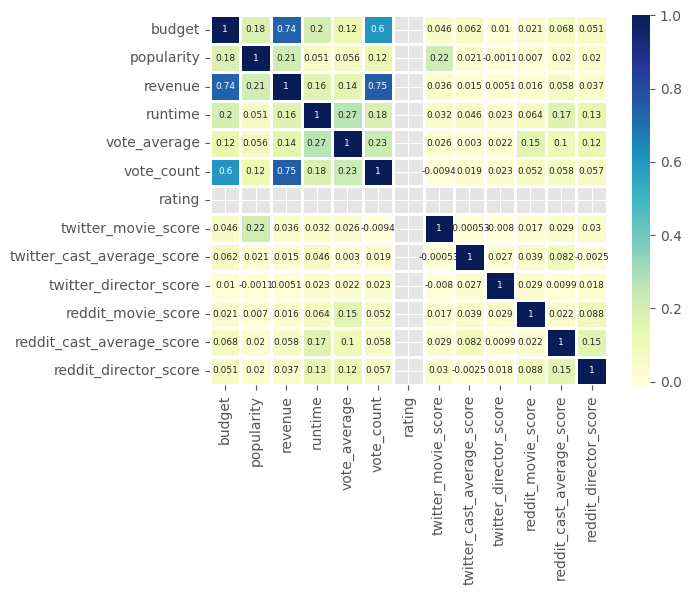

In [17]:
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), cmap='YlGnBu', annot=True, linewidths=1, annot_kws={"fontsize":6.5})

From this corr chart we can see that revenue is strongly correlated with budget where as least correlated  runtime.

C:\Users\hongj\AppData\Local\Temp\ipykernel_4260\4261648643.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




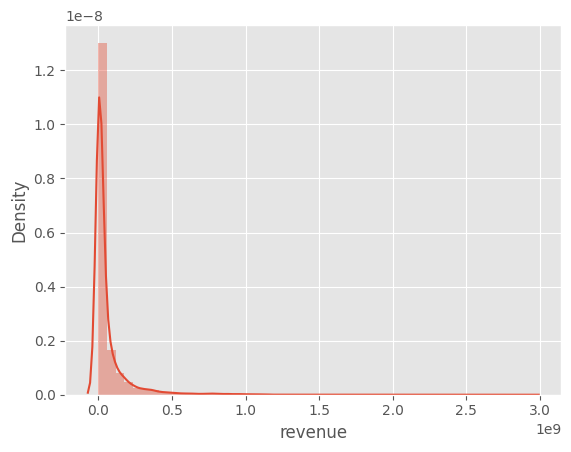

In [18]:
sns.distplot(df.revenue);

We can see that this data is very skewed and therefore it is difficult to draw conclusion from this graph thus we need to normalise this data.

<font color='skyblue'>**Introducing to log**</font>


Why is skewed data not a good fit for modeling in Linear Regression ?

Skewed data is not a good fit for modeling in Linear Regression for several reasons. 
* Firstly, skewed data may act as outliers, and outliers can negatively affect the performance of our model. 
* Secondly, skewed data may have uneven mean, median, and mode, which can affect the accuracy of predictions made using the model. 
* Additionally, statistical tests are usually based on the assumption of normality (normal distribution), which is not satisfied when dealing with skewed data.

To address the issue of skewed data, one common approach is to use the log transformation, which is a popular method used in research. The log transformation helps to linearize the fit as much as possible and can improve the accuracy of predictions. Therefore, in the case of revenue prediction, log transformation can be used to address the issue of skewed data.

In [19]:
# Creating log transformation for reveune
df['log_revenue'] = np.log1p(df['revenue']) # Not using log0 to avoid & and null value as there might be 0 value

C:\Users\hongj\AppData\Local\Temp\ipykernel_4260\3901348275.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Distribuition of Revenue(log transformation)')

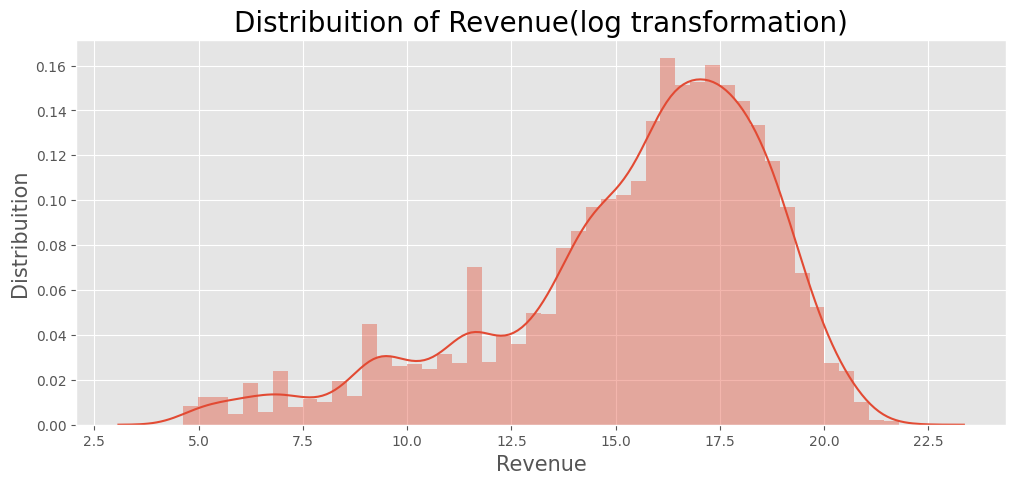

In [20]:
plt.figure(figsize=(12,5))

# Subplot allow us to plot more than one 
# in this case, will be create a subplot grid of 2 x 1

# seting the distribuition of our data and normalizing using np.log on values highest than 0 and + 
# also, we will set the number of bins and if we want or not kde on our histogram
ax = sns.distplot(df['log_revenue'])
ax.set_xlabel('Revenue', fontsize=15) #seting the xlabel and size of font
ax.set_ylabel('Distribuition', fontsize=15) #seting the ylabel and size of font
ax.set_title("Distribuition of Revenue(log transformation)", fontsize=20) #seting the title and size of font

C:\Users\hongj\AppData\Local\Temp\ipykernel_4260\1974850217.py:3: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



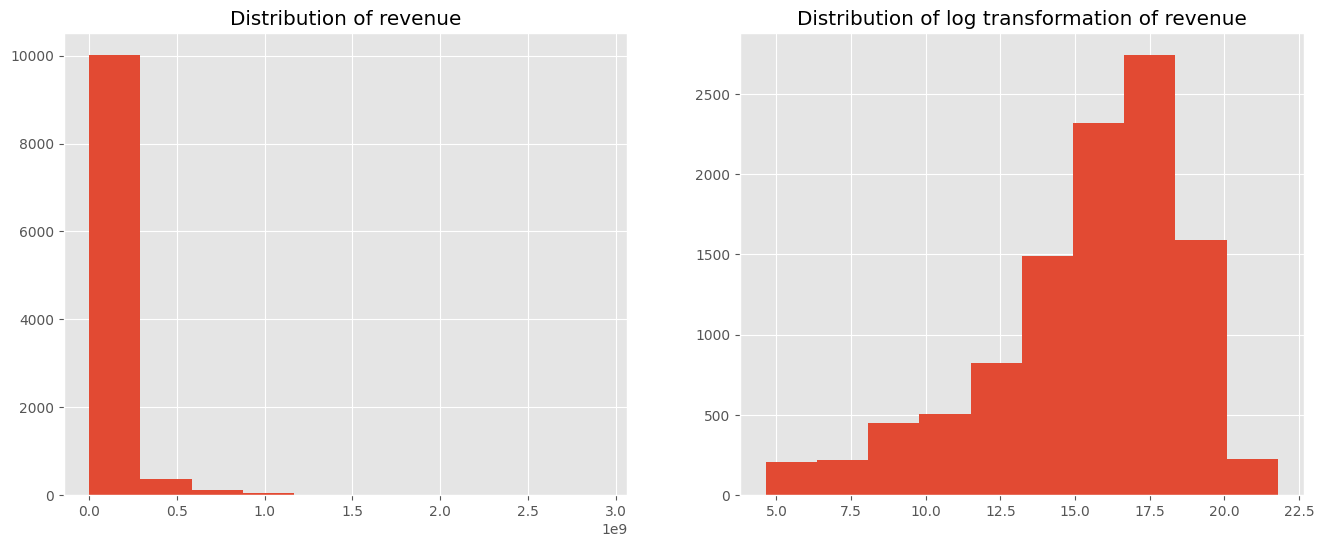

In [21]:
# Comapring distribution of reveune and log revune side by side with histogram
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1) #1 means 1 plot, 2 means column and 1 mean 1 sub plot
plt.hist(df['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)#1 means 1 plot, 2 means column and 2 mean second sub plot
plt.hist(df['log_revenue']);
plt.title('Distribution of log transformation of revenue');

We can observe that the original distribution, which is the one without log transformation, is highly skewed. To address this issue, we employed the log transformation technique, which resulted in a normally distributed dataset with lower levels of skewness and kurtosis.

<font color='skyblue'>**Relationship between Film Revenue and Budget**</font>

Now we will explore the correlation between revenue and budget and find the degree of co-relation.

In [22]:
# log transformation of budget
df['log_budget'] = np.log1p(df['budget'])

C:\Users\hongj\AppData\Local\Temp\ipykernel_4260\3316716362.py:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



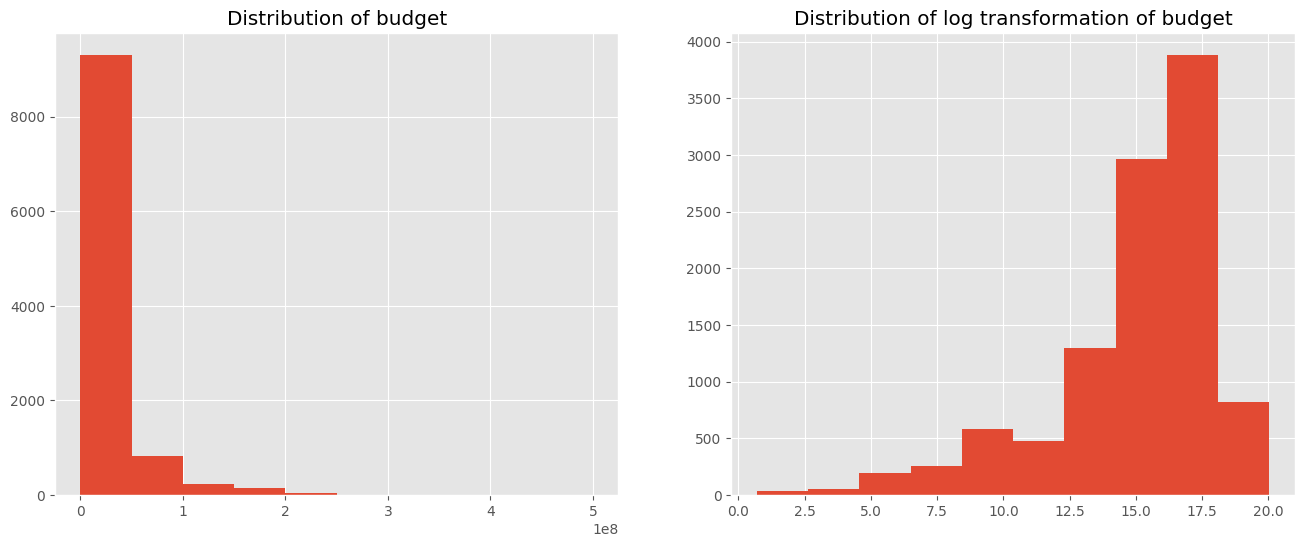

In [23]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(df['budget']);
plt.title('Distribution of budget');
plt.subplot(1, 2, 2)
plt.hist(df['log_budget']);
plt.title('Distribution of log transformation of budget');

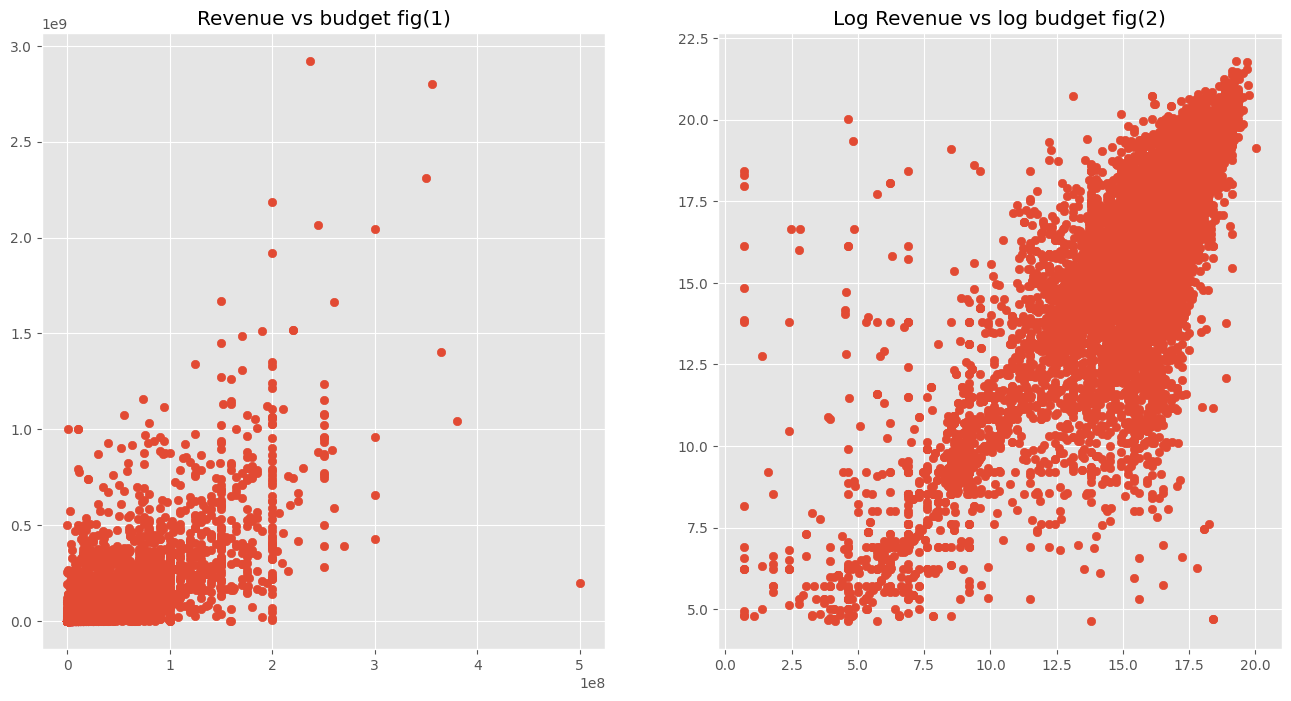

In [24]:
# Create scatter plot
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(df['budget'], df['revenue'])
plt.title('Revenue vs budget fig(1)');
plt.subplot(1, 2, 2)
plt.scatter(df['log_budget'], df['log_revenue'])
plt.title('Log Revenue vs log budget fig(2)');

* Figure 1:there appears to be some correlation between budget and revenue, but it is not very clear.
* Figure 2, we can see a stronger correlation between the log-transformed revenue and the log-transformed budget. 
* It is worth noting that there are many movies with a zero budget, as we identified earlier with 815 such movies, but we will address this issue later.

<font color='skyblue'>**IHow does having a Homepage impacting the Revenue?**</font>

Let's investigate the correlation between two variables: having an official homepage for a movie and its revenue. 
Specifically, we are interested in determining whether having an official homepage for a movie affects its revenue or not. It is important to note that each movie will have a unique homepage, except for movies that have a sequel or prequel.

In [25]:
# Check if movies website has count less than 1( means unique) or more than 1( means repeatetive) or not.
df['homepage'].value_counts().head(10)

homepage
http://www.missionimpossible.com/               4
http://www.transformersmovie.com/               4
http://www.thehungergames.movie/                4
http://www.workandtheglory.com/                 3
http://www.kungfupanda.com/                     3
http://www.thehobbit.com/                       3
http://www.rangitaranga.com/                    3
http://disney.go.com/disneypictures/pirates/    2
http://www.priest-themovie.com/                 2
http://www.munkyourself.com/                    2
Name: count, dtype: int64

We can observe that the web page for the Transformers movie is listed 4 times, which is expected as we know that this movie has a sequel.

Now we will explore this furthur to see if it affects the revenue

In [26]:
# Creat column called has_homepage and pass two value 1,0 (1, indicates has home page, 0 indicates no page)
df['has_homepage'] = 0
df.loc[df['homepage'].isnull() == False, 'has_homepage'] = 1 #1 here means it has home page


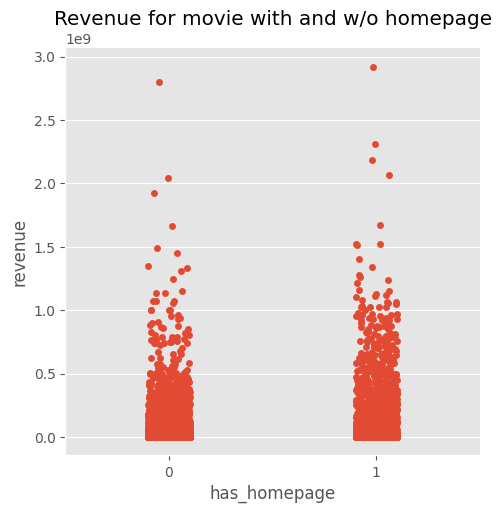

In [27]:
# Since has_homepage is categorical value we will be using seaborn catplot.
sns.catplot(x='has_homepage', y='revenue', data=df);
plt.title('Revenue for movie with and w/o homepage');

The scatterplot indicates that there could be a correlation between having a home page and generating more revenue. The blue dots, which represent movies with a home page, generally have higher revenue than the orange dots, which represent movies without a home page.

<font color='skyblue'>**Langauge distribution vs mean reveune**</font>

Let's explore the relationship between language and revenue. We will first extract the top 10 languages from the data frame and select only the languages that are in the original language of the movie. Then, we will use a box plot to visualize the relationship between language and revenue. Box plots are useful for identifying outliers.

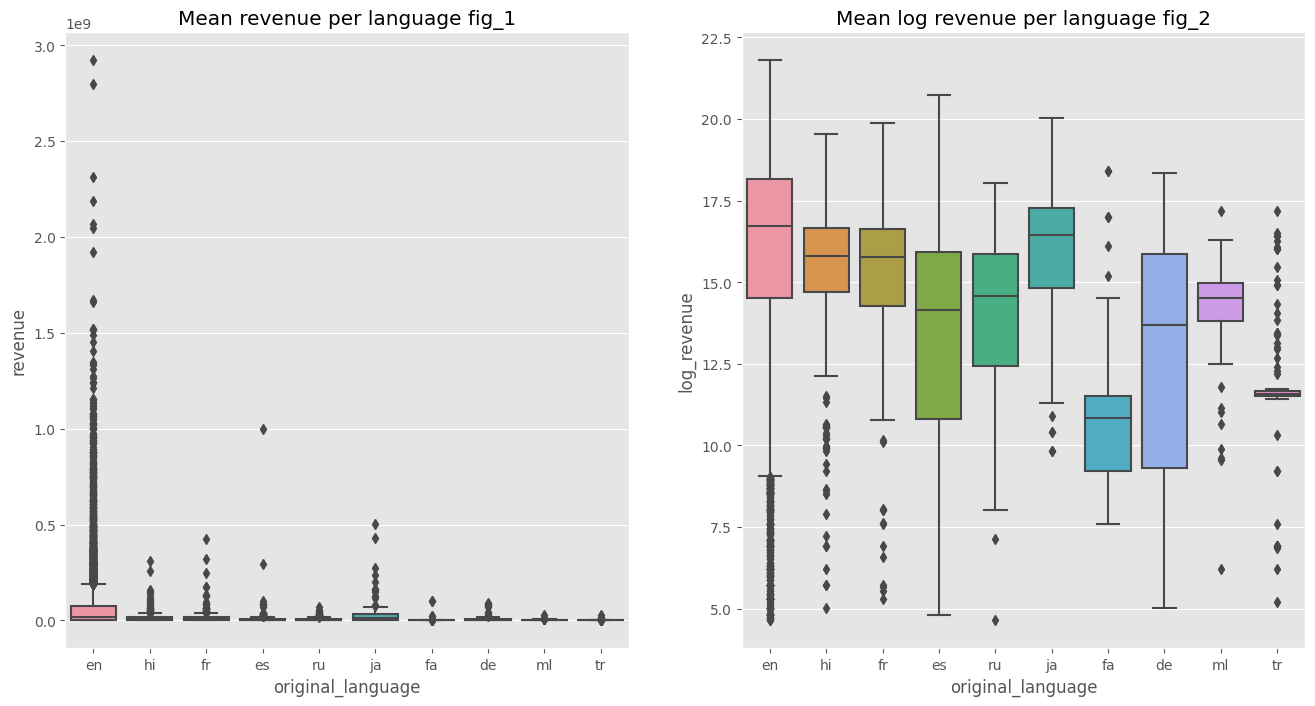

In [28]:
# Blox pot will be used
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y='revenue', data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)]);
plt.title('Mean revenue per language fig_1');
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y='log_revenue', data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)]);
plt.title('Mean log revenue per language fig_2');

> In fig_1, the x-axis represents the language plotted, and we can observe that movies in the English language have a much higher revenue compared to movies in other languages. However, this graph is misleading because it suggests that English language movies overshadow all other languages in terms of revenue. To get a clearer picture, we can refer to fig_2, which plots the original language against the log transformation of revenue. Here we can see that movies in other languages also generate revenue close to English language movies, but English language movies are still leading in terms of revenue.

<font color='skyblue'>**What are the most frequent or popular Words in Film Titles and Discriptions ?**</font>


This might be helpful for film making industries to determind which popular film titles should they used and we also wanted to know if description affects revenue or not.

Wordcount library is being used, and Word cloud is data visualization technique used for representaion of text data in which size of each word indicates it frequency or importance.

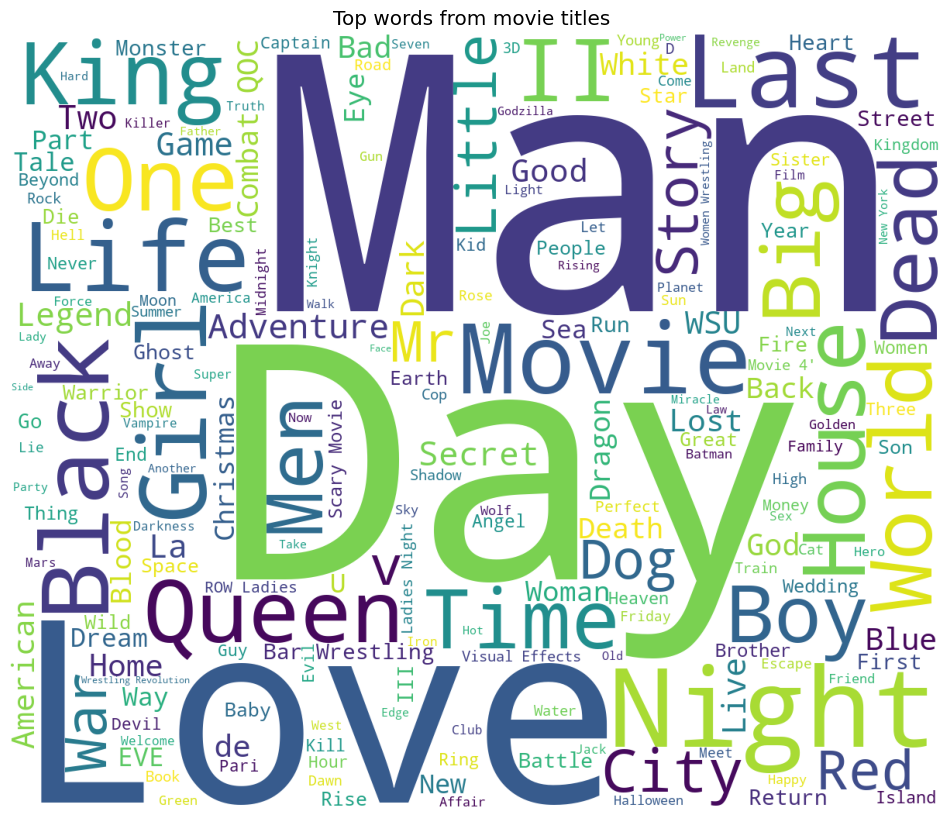

 Time taken to complete this operation is 1.9355747699737549 seconds


In [29]:
# Find top words from movie Titles
start = time.time()
plt.figure(figsize = (12, 12))
token_title = ' '.join(df['original_title'].values) #create split to title by sprace to extract the text.
#bg color set to white for good contrast, by default bg color is darker
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(token_title)
plt.imshow(wordcloud)
plt.title('Top words from movie titles ')
plt.axis("off") # we dont need axes for this
plt.show()
print(" Time taken to complete this operation: ", time.time() - start, 'seconds')

We can see that the most popular word are Man,Last, La and so on. The most popular or frequent words are in bigger in size.

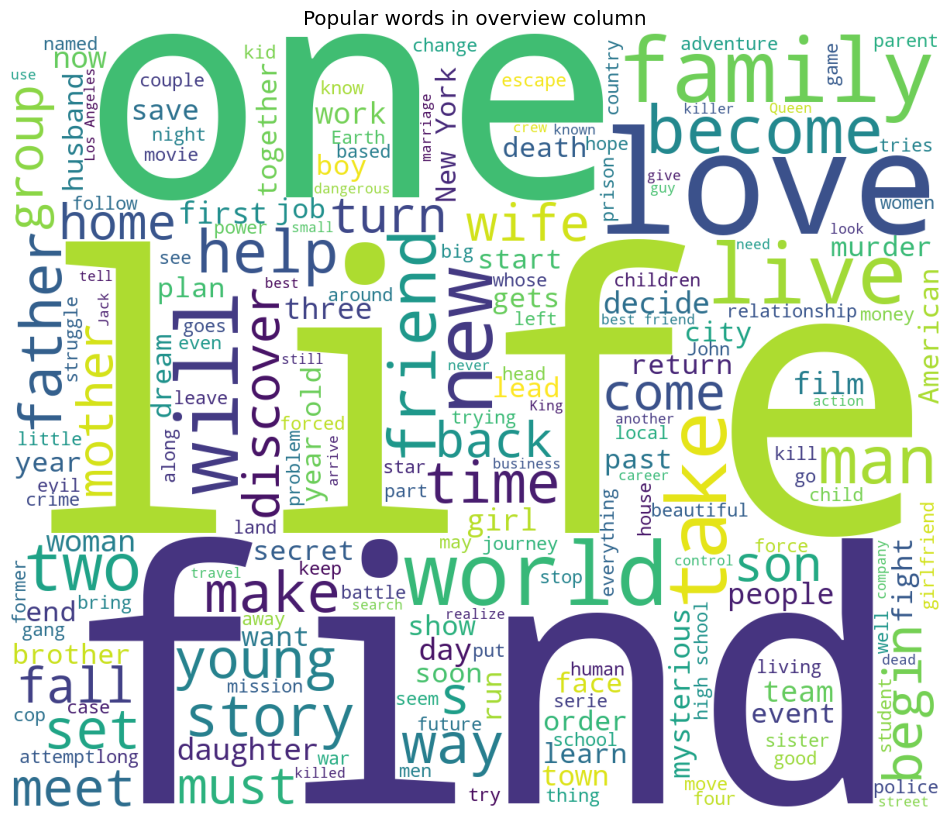

 Time taken to complete this operation is 3.0085771083831787 seconds


In [30]:
# Find the popular words from overview coulumn
start = time.time()
plt.figure(figsize = (12, 12))
text = ' '.join(df['overview'].fillna('').values) #fill the values with empty string if there is no value in it.
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Popular words in overview column')
plt.axis("off")
plt.show()
print(" Time taken to complete this operation: ", time.time() - start, 'seconds')

Larger words means frequent occuring words. We can see that life, find,one and so on are most popular words in movie description.

<font color='skyblue'>**Does the film description affects revenue**</font>

Let's find out if there is any link between words and revenue. Does the word in description affects revenue?

For this approach we will be using linear regression method . Yes linear regression for string data and we can achieve this by using TFID vector.


* TFID helps tp transforms text to feature vectors that can be used as input to estimator.
* TFID is numerical represenation of frequency of words around data description.

We will fit a linear regression model to this data to predict revenue generate. For this we will be using eli5 pacakge which helps to debug Machine learning classifier and also helps us to explain the prediction.So that it wil be easier to find which words affect revenue.




In [31]:
vectorizer = TfidfVectorizer(
            sublinear_tf=True,
            analyzer='word',
            token_pattern=r'\w{1,}',
            ngram_range=(1, 2),
            min_df=5)

overview_text = vectorizer.fit_transform(df['overview'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text, df['log_revenue'])
eli5.show_weights(linreg, vec=vectorizer, top=20, feature_filter=lambda x: x != '<BIAS>')

We can see that words in description can have both positve and negative impacts on revenue. Words like to, bombing ,complication has positive impact and words like politicina,18, violence has negative impact on revenue.

In [32]:
print('Target value:', df['log_revenue'][1000])
eli5.show_prediction(linreg, doc=df['overview'].values[1000], vec=vectorizer)

Target value: 15.937179945492133


We can see that words in title can have both positve and negative impacts on revenue. Words like don't age, the secret and so on  has positive impact and words like death, she, land, hell and so on from movie titles has negative impact.

## <font color='skyblue'>**Featured Engineering**</font>


Issue with release_date is its not in right format so we need to standarlize using pandas date time format.

In [33]:
df.loc[df['release_date'].isnull() == False, 'release_date'].head() #to see if release date has null value.

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-12-22
Name: release_date, dtype: object

<font color='blue'>fixing date column</font>

In [34]:
#drop nan columns
df = df.dropna(subset = ['release_date'])

In [35]:
def fix_date(x):
    '''
    if the value of date here is less than
    or equal to 19 we can prepend 20 infront of this
    to say that movie is from 2000s
    else we can prepend 19 to say that the movie is
    from 1900s
    '''
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

In [36]:
#df['release_date'] = df['release_date'].apply(lambda x: fix_date(x)) #applying lambda function

In [37]:
#let's create additional column like Year, month, week, quarter
df['release_date'] = pd.to_datetime(df['release_date']) #converting into panda date time
df['release_date'].head()

0   1995-10-30
1   1995-12-15
2   1995-12-22
3   1995-12-22
4   1995-12-22
Name: release_date, dtype: datetime64[ns]

In [38]:
def process_date(df_date):
    '''This function adds columns like year, weekday, month, weekofyear, day, and quarter.
    It adds the prefix "release_date" before each of the columns, e.g., "release_date_year".'''
    date_parts = ["year", "weekday", "month", "day", "quarter"]
    
    # Convert 'release_date' column to datetime data type
    df_date['release_date'] = pd.to_datetime(df_date['release_date'])
    
    for part in date_parts:
        part_col = 'release_date' + "_" + part
        if part == "weekofyear":
            values = df_date['release_date'].dt.isocalendar().week
        else:
            values = getattr(df_date['release_date'].dt, part).fillna(-1).astype(int)
        df_date[part_col] = values
    
    return df_date


In [39]:
df = process_date(df)

In [40]:
# Count no.of films released per year and sort the years in ascending order
# Do this for both Train and Test Sets
d1 = df['release_date_year'].value_counts().sort_index()


# x values are years, and y values are movie counts, name=legend
data = go.Scatter(x=d1.index, y=d1.values, name='movies data')

layout = go.Layout(title = "Number of films per year", xaxis_title = 'Release date in Year',yaxis_title = 'Movie Count')
py.iplot(dict(data=data, layout=layout))


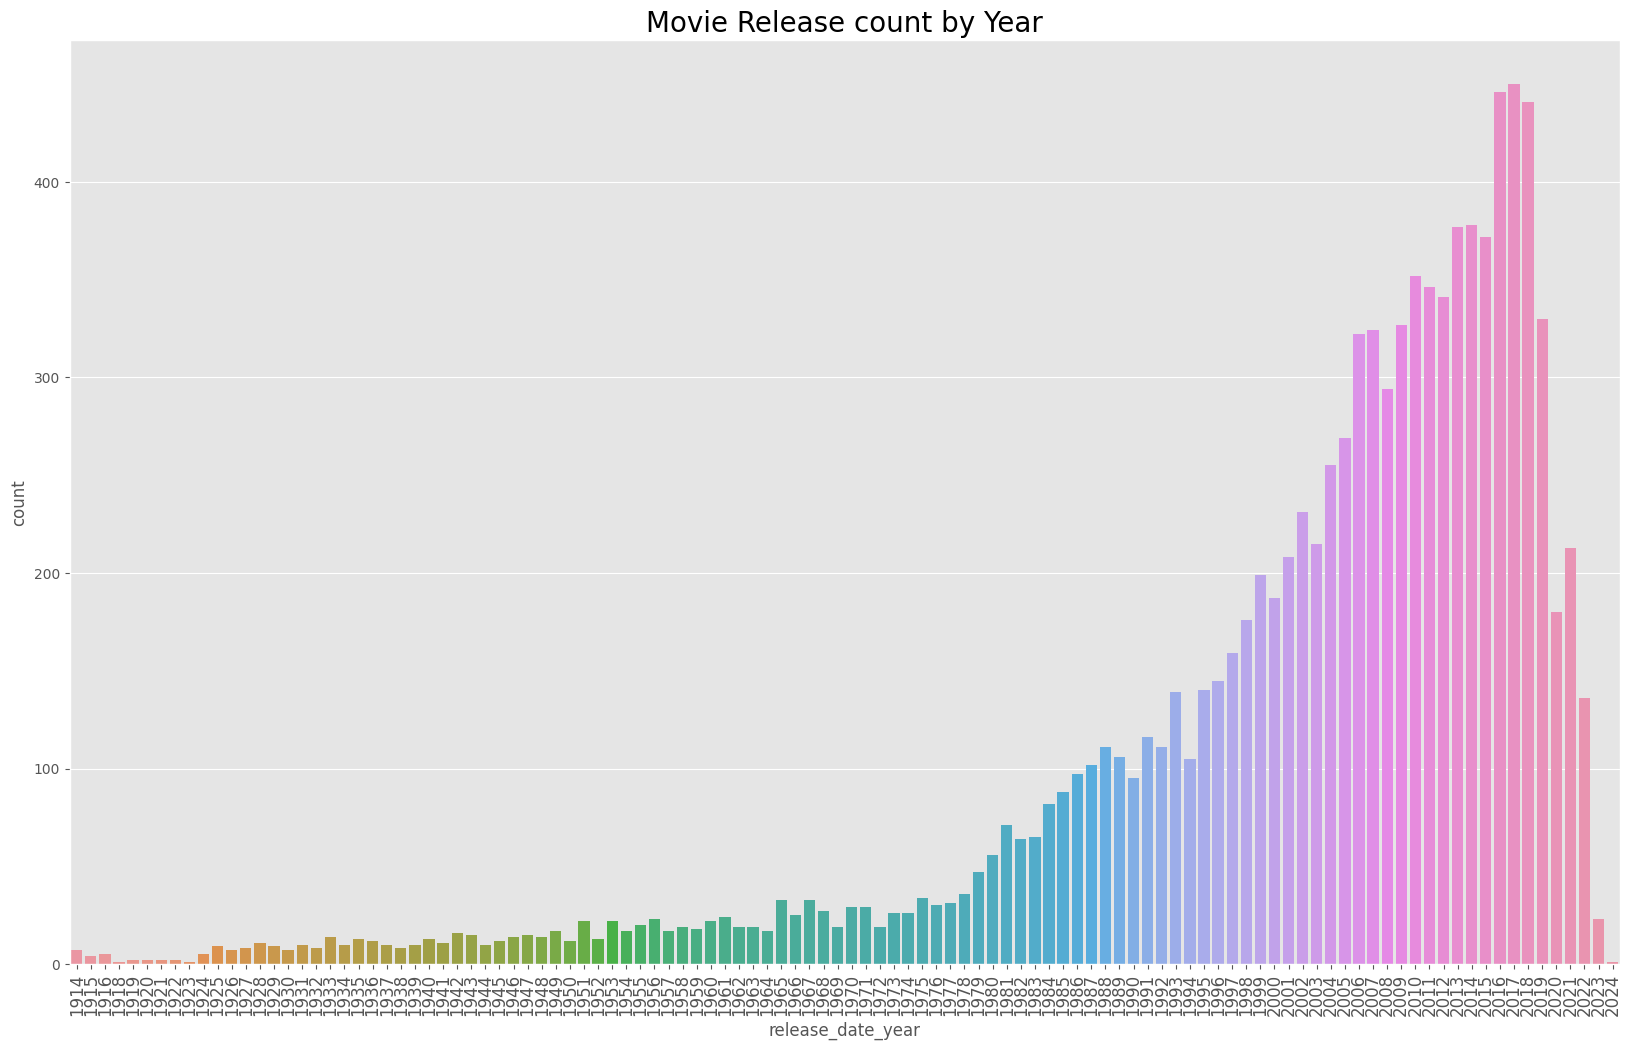

In [41]:
#countplot chart for movies release year
plt.figure(figsize=(20,12))
sns.countplot(x = df['release_date_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

The visualization indicates that there has been a significant increase in the number of movies released since the 2000s. 
And since our dataset is mainly about movies that are having revenue, so the increase slows down in the previous years of 2023.

In [42]:
# Plot for release date vs revenue
d1 = df['release_date_year'].value_counts().sort_index()
d2 = df.groupby(['release_date_year'])['revenue'].mean()

data = [go.Scatter(x=d1.index, y=d1.values, name='film count'),
        go.Scatter(x=d2.index, y=d2.values, name='mean revenue', yaxis='y2')]

layout = go.Layout(dict(title = "Number of films and average revenue per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2=dict(title='Average revenue', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

From this chart we can see that graph of total revenue vs movie release count are tend to increase with each other

<font color='skyblue'>**Does the release date of the movie affecting the revenue ?**</font>

We will be creating categorical plot as day of the week, month are not continuous data.

<Figure size 2000x500 with 0 Axes>

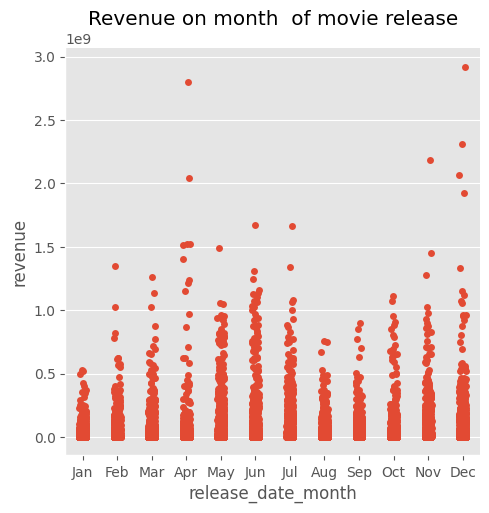

In [43]:
#since day, month are categorical variable
plt.figure(figsize=(20,5));
sns.catplot(x='release_date_month', y='revenue', data=df);
plt.title('Revenue on month  of movie release');
#lets replace number by actual month name
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=10)
plt.show()


From the above chart we can see that movie released in April has maximum revenue where as movie released in jan has less revenue compared to other months.

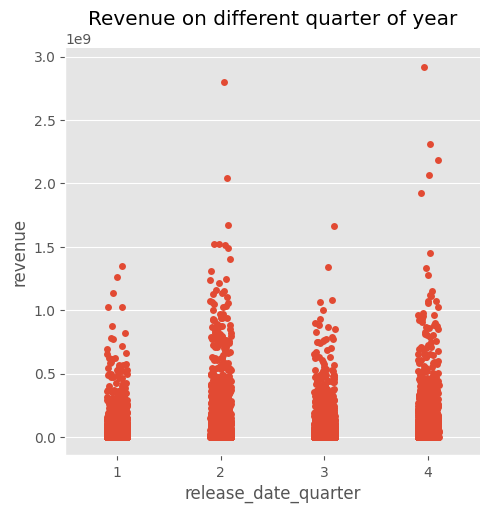

In [44]:
sns.catplot(x='release_date_quarter', y='revenue', data=df);
plt.title('Revenue on different quarter of year');

From the above chart we can see that movie released in second quarter (April-June) has more revenue compared to movie released in last quarter

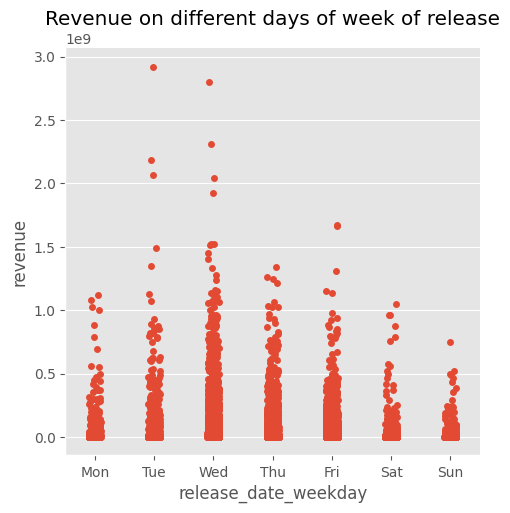

In [45]:
sns.catplot(x='release_date_weekday', y='revenue', data=df);
plt.title('Revenue on different days of week of release');
loc, labels = plt.xticks()
#putting label for days
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels)
plt.show()


Surprisingly movie released on wednesday and thursday has more revenue.

Well there seems to have correlation but it may not have one to one causal effect.

In [46]:
#top 20 movie by revenue
movies_20 =  df.sort_values(by='revenue', ascending=False).head(20)[['original_title','revenue','release_date_year']]

In [47]:
movies_20

,original_title,revenue,release_date_year
6682,Avatar,2.920357e+09,2009
10922,Avengers: Endgame,2.799439e+09,2019
8964,Avatar: The Way of Water,2.312336e+09,2022
1100,Titanic,2.187464e+09,1997
8958,Star Wars: The Force Awakens,2.068224e+09,2015
10904,Avengers: Infinity War,2.046240e+09,2018
10889,Spider-Man: No Way Home,1.921847e+09,2021
8836,Jurassic World,1.671537e+09,2015
10962,The Lion King,1.663075e+09,2019
7396,The Avengers,1.518816e+09,2012


<font color='blue'>**Relation between runtime and revenue ?**</font>

C:\Users\hongj\AppData\Local\Temp\ipykernel_4260\1805120950.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




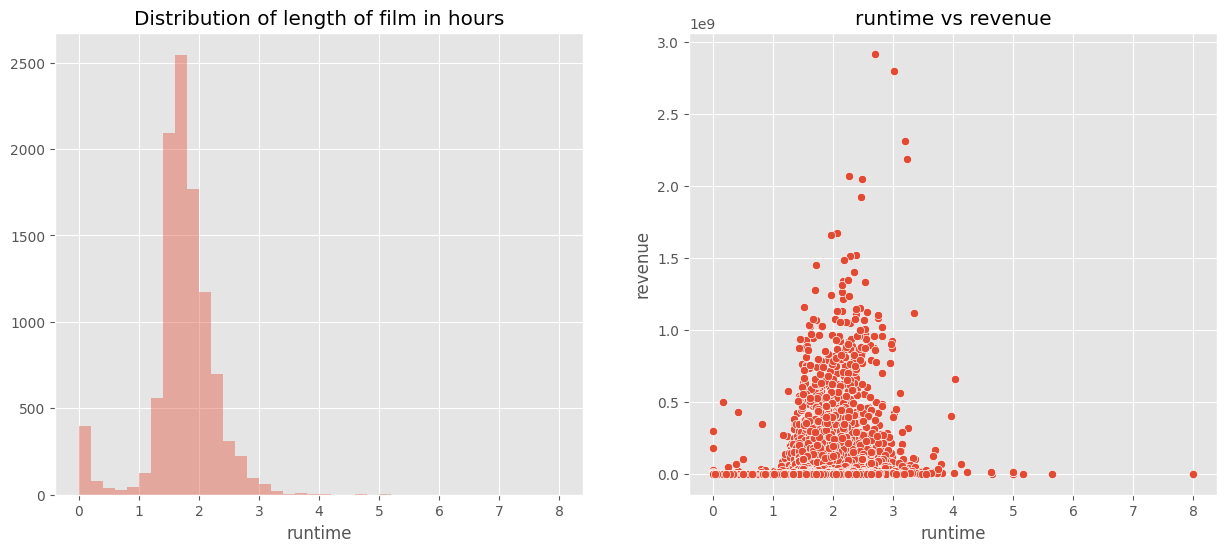

In [48]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(df['runtime'].fillna(0) / 60, bins=40, kde=False); #filling runtime with 0 if there were any missing values
plt.title('Distribution of length of film in hours');
plt.subplot(1, 2, 2)
sns.scatterplot(x = df['runtime'].fillna(0)/60, y = df['revenue'])
plt.title('runtime vs revenue');


Here we have run time in hour on x-axis and freq of movie in on y axis and then we cas see that most of the movie are between 1-3 hr.And the movie that fall on this duration has highest revenue.

<font color='skyblue'>**Find top genres from the movie list**</font>

In [49]:
# Apply the same preprocessing on the string values
# df.genres = df.genres.apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))
df.genres.head()

0    ["Animation", "Adventure", "Family", "Comedy"]
1                ["Adventure", "Fantasy", "Family"]
2                             ["Romance", "Comedy"]
3                    ["Comedy", "Drama", "Romance"]
4                              ["Drama", "History"]
Name: genres, dtype: object

In [50]:
import ast
import pandas as pd

# Preprocess the genres column to convert the string representation of lists to actual lists
df['genres'] = df['genres'].apply(ast.literal_eval)

# Extract the unique genres from the "genres" column
unique_genres = pd.Series(df['genres'].sum()).unique()

# Print the number of genres and the unique genres themselves
print("Number of genres: {}".format(len(unique_genres)))
print("Genres: {}".format(unique_genres))


Number of genres: 20
Genres: ['Animation' 'Adventure' 'Family' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'History' 'Horror' 'Action' 'Crime' 'Thriller' 'Science Fiction'
 'Mystery' 'Music' 'Documentary' 'War' 'Western' 'TV Movie' 'Foreign']


In [51]:
genres_dummies = pd.get_dummies(df["genres"].apply(pd.Series).stack().str.strip("[]").str.replace("'", ""))
genres_dummies = genres_dummies.groupby(level=0).sum()
genres_dummies

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16497,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
16499,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
16500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16502,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [52]:
train_genres = pd.concat([df, genres_dummies],axis=1, sort=False) #merging two data frame
train_genres.head(5)

,adult,belongs_to_collection,homepage,id,imdb_id,production_countries,spoken_languages,video,keywords,backdrop_path,recommendations,budget,genres,original_language,original_title,overview,popularity,poster_path,production_companies,release_date,revenue,runtime,status,tagline,vote_average,vote_count,cast,director,New_status,rating,Top Cast,twitter_movie_score,twitter_cast_average_score,twitter_director_score,reddit_movie_score,reddit_cast_average_score,reddit_director_score,log_revenue,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_day,release_date_quarter,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",http://toystory.disney.com/toy-story,862,tt0114709,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",false,martial arts-jealousy-friendship-bullying-elem...,/lxD5ak7BOoinRNehOCA85CQ8ubr.jpg,863-10193-585-12-9806-2062-14160-920-808-10681...,30000000.0,"[Animation, Adventure, Family, Comedy]",en,Toy Story,Led by Woody Andy's toys live happily in his r...,111.892,/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg,Pixar,1995-10-30,373554033.0,81.0,Released,NaN,7.966,16430.0,Tom Hanks-Tim Allen-Don Rickles-Jim Varney-Wal...,John Lasseter,False,NaN,"[""Tom Hanks"", "" \""Tim Allen"", "" \""Don Rickles""...",0.0,0.044497,0.312977,0.436937,0.535185,0.281553,19.738573,17.216708,1,1995,0,10,30,4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,NaN,NaN,8844,tt0113497,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",false,giant insect-board game-jungle-disappearance-r...,/pYw10zrqfkdm3yD9JTO6vEGQhKy.jpg,1593-788-879-771-854-772-118-353486-310-18360-...,65000000.0,"[Adventure, Fantasy, Family]",en,Jumanji,When siblings Judy and Peter discover an encha...,13.680,/vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg,TriStar Pictures-PolyGram Filmed Entertainment...,1995-12-15,262821940.0,104.0,Released,Roll the dice and unleash the excitement!,7.237,9437.0,Robin Williams-Kirsten Dunst-Bradley Pierce-Bo...,Joe Johnston,False,NaN,"[""Robin Williams"", "" \""Kirsten Dunst"", "" \""Bra...",0.0,0.048193,0.236220,0.432225,0.440129,0.708738,19.386987,17.989898,0,1995,4,12,15,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,15602,tt0113228,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",false,fishing-halloween-sequel-old man-best friend-w...,/1J4Z7VhdAgtdd97nCxY7dcBpjGT.jpg,11520-12139-5825-951-11846-9340-620-329-24428,25000000.0,"[Romance, Comedy]",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.879,/1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg,Lancaster Gate-Warner Bros. Pictures,1995-12-22,71500000.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,6.500,324.0,Walter Matthau-Jack Lemmon-Ann-Margret-Sophia ...,Howard Deutch,False,NaN,"[""Walter Matthau"", "" \""Jack Lemmon"", "" \""Ann"",...",0.0,0.481034,0.500000,0.321429,0.532526,0.842105,18.085208,17.034386,0,1995,4,12,22,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,False,NaN,NaN,31357,tt0114885,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",false,based on novel or book-interracial relationshi...,/jZjoEKXMTDoZAGdkjhAdJaKtXSN.jpg,NaN,16000000.0,"[Comedy, Drama, Romance]",en,Waiting to Exhale,Cheated on mistreated and stepped on the women...,14.013,/4uw6HKq4vlhrSVp0zkgd4zCy4Pf.jpg,20th Century Fox,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,6.300,128.0,Whitney Houston-Angela Bassett-Loretta Devine-...,Forest Whitaker,False,NaN,"[""Whitney Houston"", "" \""Angela Bassett"", "" \""L..."

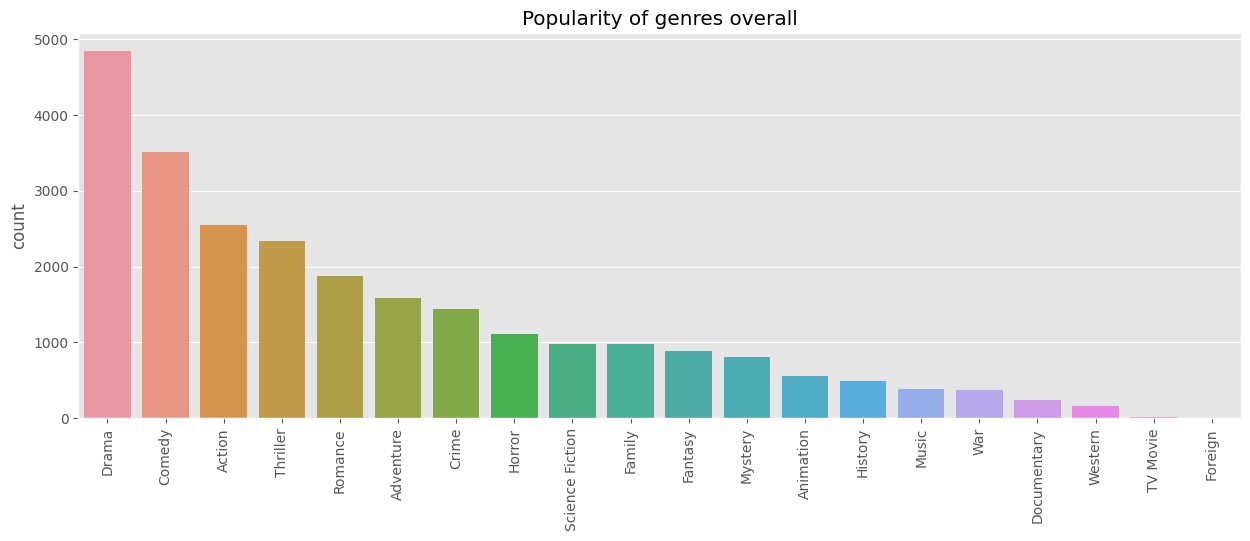

In [53]:
genres_overall = train_genres[unique_genres].sum().sort_values(ascending=False)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=genres_overall.index, y=genres_overall.values)
plt.xticks(rotation=90)
plt.title("Popularity of genres overall")
plt.ylabel("count")
plt.show()

We can see that , from above genre, Drama is more popular ad foreign movie are least popular.

<font color='skyblue'>**Model Prediction**</font>

In [54]:
train_genres.columns

Index(['adult', 'belongs_to_collection', 'homepage', 'id', 'imdb_id',
       'production_countries', 'spoken_languages', 'video', 'keywords',
       'backdrop_path', 'recommendations', 'budget', 'genres',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'release_date', 'revenue',
       'runtime', 'status', 'tagline', 'vote_average', 'vote_count', 'cast',
       'director', 'New_status', 'rating', 'Top Cast', 'twitter_movie_score',
       'twitter_cast_average_score', 'twitter_director_score',
       'reddit_movie_score', 'reddit_cast_average_score',
       'reddit_director_score', 'log_revenue', 'log_budget', 'has_homepage',
       'release_date_year', 'release_date_weekday', 'release_date_month',
       'release_date_day', 'release_date_quarter', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
      

In [55]:
#selecting the numeric column
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] #so that easy for us to perform  train and test
df_train=train_genres.select_dtypes(include=numerics)

In [56]:
#dropping the id coulmn
#df_train.drop(columns=['id'],inplace=True) #we will be dropping ID

# Clear null values
df_train=df_train.fillna(df_train.median()) #let's film the empty value with median of the data set

In [57]:
#selecting dataframe that is float,int
df_train.columns

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'rating', 'twitter_movie_score',
       'twitter_cast_average_score', 'twitter_director_score',
       'reddit_movie_score', 'reddit_cast_average_score',
       'reddit_director_score', 'log_revenue', 'log_budget', 'has_homepage',
       'release_date_year', 'release_date_weekday', 'release_date_month',
       'release_date_day', 'release_date_quarter', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

<font color='skyblue'>**Loading data from Training**</font>

In [58]:
df_train['rating'] = df_train['rating'].fillna(0)
df_train

,budget,popularity,revenue,runtime,vote_average,vote_count,rating,twitter_movie_score,twitter_cast_average_score,twitter_director_score,reddit_movie_score,reddit_cast_average_score,reddit_director_score,log_revenue,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_day,release_date_quarter,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,30000000.0,111.892,373554033.0,81.0,7.966,16430.0,0.0,0.0,0.044497,0.312977,0.436937,0.535185,0.281553,19.738573,17.216708,1,1995,0,10,30,4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,65000000.0,13.680,262821940.0,104.0,7.237,9437.0,0.0,0.0,0.048193,0.236220,0.432225,0.440129,0.708738,19.386987,17.989898,0,1995,4,12,15,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25000000.0,11.879,71500000.0,101.0,6.500,324.0,0.0,0.0,0.481034,0.500000,0.321429,0.532526,0.842105,18.085208,17.034386,0,1995,4,12,22,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,16000000.0,14.013,81452156.0,127.0,6.300,128.0,0.0,0.0,0.478686,-0.552932,0.566667,0.452171,0.596491,18.215526,16.588099,0,1995,4,12,22,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,44000000.0,9.483,13681765.0,192.0,6.900,291.0,0.0,0.0,0.116122,0.481000,0.524324,0.376679,0.188679,16.431575,17.599700,0,1995,4,12,22,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,500.0,0.600,500.0,13.0,8.000,1.0,0.0,0.0,0.077560,0.000000,0.504167,0.127502,0.422222,6.216606,6.216606,0,2021,4,7,30,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16500,10.0,0.600,500.0,0.0,10.000,1.0,0.0,0.0,0.077560,0.000000,0.000000,0.352941,0.058824,6.216606,2.397895,0,2020,4,6,26,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16502,500.0,0.600,700.0,4.0,0.000,0.0,0.0,0.0,0.077560,0.000000,0.527273,0.428571,1.000000,6.552508,6.216606,0,2020,1,11,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16505,500.0,0.600,500.0,0.0,0.000,0.0,0.0,0.0,0.077560,0.000000,0.490066,0.431417,0.123288,6.216606,6.216606,0,2018,1,2,13,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#training the model
X = df_train.drop(['revenue', 'log_revenue'], axis=1)
y= df_train['revenue'] #prediction
X.columns = X.columns.astype(str)
y.columns = X.columns.astype(str)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
# Fill missing values with mean value of each column

X_train_mean = X_train.fillna(X_train.mean())
X_test_mean = X_test.fillna(X_test.mean())

# Remove feature/column names from the input data
X_train_values = X_train_mean.values
X_test_values = X_test_mean.values

In [61]:
from sklearn.linear_model import LinearRegression

# Initialize the model and fit on the data
lm = LinearRegression()
lm.fit(X_train_values, y_train)

# Make predictions on the test data and calculate R-squared score
lm_preds = lm.predict(X_test_values)
print("R Square: ", r2_score(y_test, lm_preds))

R Square:  0.742407202065605


Our R square value is 74.24%

In [62]:
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics

# Create an instance of the RandomForestRegressor model
RF_model = RandomForestRegressor(random_state=0, n_estimators=500, max_depth=10)

RF_model.fit(X_train_values, y_train)

# Make predictions on the imputed test data
y_hat = RF_model.predict(X_test_values)

# Calculate and print the R-squared score
print("R-Squared is:", metrics.r2_score(y_test, y_hat))


R-Squared is: 0.7788143529416811


Our predicted from Random forest is 77.88% accurate.

In [63]:
RF_model.feature_importances_

array([1.34869287e-01, 7.18590407e-02, 2.36923385e-02, 1.62605664e-02,
       4.92310732e-01, 0.00000000e+00, 2.98192398e-03, 4.65829190e-03,
       1.11972975e-03, 1.42246273e-02, 1.57512722e-02, 1.08052738e-02,
       1.43369773e-01, 1.37644120e-03, 1.82868837e-02, 3.76260227e-03,
       4.65470602e-03, 9.66499920e-03, 1.62168192e-03, 1.43016511e-03,
       7.29409607e-03, 3.00703328e-03, 1.75294287e-03, 1.00030610e-03,
       2.67991990e-04, 1.19150436e-03, 3.04367227e-03, 1.39145742e-03,
       0.00000000e+00, 2.16508687e-04, 2.58018109e-04, 9.53700635e-04,
       4.57549415e-04, 1.75223939e-03, 2.48302553e-03, 5.94702934e-07,
       1.86431092e-03, 1.90674553e-04, 1.74038143e-04])

                            importance
feature                               
vote_count                       0.492
log_budget                       0.143
budget                           0.135
popularity                       0.072
runtime                          0.024
release_date_year                0.018
reddit_cast_average_score        0.016
vote_average                     0.016
reddit_movie_score               0.014
reddit_director_score            0.011
release_date_day                 0.010
Adventure                        0.007
release_date_month               0.005
twitter_cast_average_score       0.005
release_date_weekday             0.004
Family                           0.003
twitter_movie_score              0.003
Animation                        0.003
Comedy                           0.002
Science Fiction                  0.002
Thriller                         0.002
release_date_quarter             0.002
Romance                          0.002
Music                    

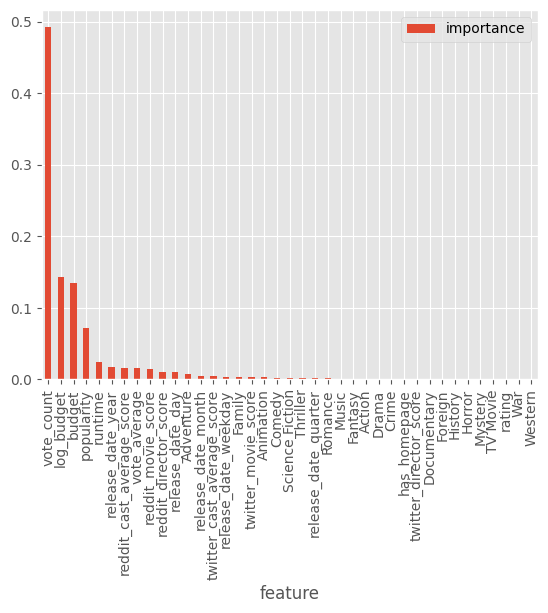

In [64]:
column_names = X_train.columns

importances = pd.DataFrame({'feature':column_names,'importance':np.round(RF_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature');
print(importances)
importances.plot.bar();

We can see that Budget, popularity, runtime and release date of year (as release date of year is associated with population)has more weight on our feature.

### LGB MODEL

In [65]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

In [66]:
lgb_model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)

In [67]:
lgb_model.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

eli5.show_weights(lgb_model, feature_filter=lambda x: x != '<BIAS>')

c:\Users\hongj\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

c:\Users\hongj\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1000]	training's rmse: 5.23279e+07	valid_1's rmse: 7.73591e+07


Weight,Feature
0.4902,vote_count
0.2882,budget
0.0600,popularity
0.0362,log_budget
0.0236,vote_average
0.0164,release_date_year
0.0144,runtime
0.0127,reddit_director_score
0.0102,reddit_cast_average_score
0.0100,Adventure


In [68]:
training_score = lgb_model.score(X_train, y_train)
print("Training Score:", training_score)

# Assuming you have the actual target values stored in a variable called y_test
predictions = lgb_model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, predictions)

print("R-squared:", r2)

Training Score: 0.8953218831054719
R-squared: 0.8685625998685313


The accuracy for lgb_model is 86.7%

### GB regressor

In [69]:
#Gradient Boosting Regressor
# Fit regression model
from sklearn import ensemble

X_train_mean = X_train.fillna(X_train.mean())
X_test_mean = X_test.fillna(X_test.mean())

# Remove feature/column names from the input data
X_train_values = X_train_mean.values
X_test_values = X_test_mean.values

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': .01} 

clf = ensemble.GradientBoostingRegressor(**params)

predictions2 = clf.fit(X_train_values,y_train)
training_score = clf.score(X_train_values, y_train)
print(f"Training Score: {training_score}")

Training Score: 0.8870108477254561


In [70]:
predictions2 = np.expand_dims(clf.predict(X_test_values), axis = 1)

MSE = mean_squared_error(y_test, predictions2)
r2 = clf.score(X_test_values, y_test)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 3383053616015353.0, R2: 0.8710367142057726


Our R square predicted from GB booster is quite better than other model with R square of 87.1%

In [75]:
#Predictions for the test data
revenue_predictions = clf.predict(X_test_values)
gbr_predictions = pd.DataFrame(revenue_predictions,columns = ['revenue_predictions'])
gbr_predictions.head()

,revenue_predictions
0,8.915549e+08
1,5.215684e+08
2,1.567364e+08
3,7.717696e+06
4,6.911665e+06


In [76]:
test_result = gbr_predictions.join(y_test.reset_index(drop=True))
test_result = test_result.join(X_test.reset_index(drop=True))

#look at top values only
test_result = test_result[['budget', 'popularity', 'vote_average','vote_count','release_date_year','release_date_month', 'revenue','revenue_predictions','twitter_movie_score','twitter_cast_average_score',
                           'twitter_director_score','reddit_movie_score','reddit_cast_average_score','reddit_director_score']]
test_result.head()

,budget,popularity,vote_average,vote_count,release_date_year,release_date_month,revenue,revenue_predictions,twitter_movie_score,twitter_cast_average_score,twitter_director_score,reddit_movie_score,reddit_cast_average_score,reddit_director_score
0,195000000.0,28.514,6.166,7404.0,2011,6,1.123794e+09,8.915549e+08,0.0,0.077560,0.0,0.450980,0.672924,0.333333
1,97000000.0,68.993,7.815,17552.0,2017,2,6.190214e+08,5.215684e+08,0.0,0.077560,0.0,0.442765,0.487907,0.727273
2,45000000.0,25.230,7.397,5028.0,2006,3,1.860036e+08,1.567364e+08,0.0,0.426129,0.0,0.705521,0.636762,0.442308
3,10000000.0,1.747,6.300,11.0,2010,2,8.273900e+04,7.717696e+06,0.0,0.077560,0.0,0.355932,0.461247,0.065217
4,900000.0,8.465,6.300,80.0,1960,7,1.000000e+07,6.911665e+06,0.0,0.077560,0.0,0.526316,0.340513,0.533333


Here we can see reveune predicted from our testing model

Sample code to get information based on movie id from TMDB
TODO

In [73]:
import requests
import pandas as pd
from pandas import json_normalize

tmdb_api_key = '9b023caa1c3becd6d577ab0e41927545'

def get_movie_info(movie_id):
    # Make a request to the TMDb API for the movie information
   # https://api.themoviedb.org/3/movie/502356?api_key=9b023caa1c3becd6d577ab0e41927545&language=en-US 
    url = f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={tmdb_api_key}&language=en-US'
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Retrieve the relevant information from the response JSON
        movie_info = response.json()
        return movie_info
    else:
        print(f"Request failed with status code {response.status_code}")

# Testing
movie_id = '385687' 
movie_dict = get_movie_info(movie_id)
flat_movie_dict = json_normalize(movie_dict)
movies_df = pd.DataFrame(flat_movie_dict)
movies_df

,adult,backdrop_path,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,belongs_to_collection.id,belongs_to_collection.name,belongs_to_collection.poster_path,belongs_to_collection.backdrop_path
0,False,/cSWkX0fTjrBCU2sbEmyRFd1SxPA.jpg,340000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",https://fastxmovie.com,385687,tt5433140,en,Fast X,Over many missions and against impossible odds...,553.68,/jwMMQR69Xz9AYtX4u2uYJgfAAev.jpg,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...","[{'iso_3166_1': 'US', 'name': 'United States o...",2023-05-17,0,141,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The end of the road begins.,Fast X,False,0.0,0,9485,The Fast and the Furious Collection,/vEq10ZynOwHaSIIQ3mWohbHzvRb.jpg,/z5A5W3WYJc3UVEWljSGwdjDgQ0j.jpg


## <font color='skyblue'>Conclusion</font>

Key Finding:

* The most popular genres, ranked in order, are Drama, Comedy, and Action.
* Among all genres, Adventure has the most significant impact on the box office.
* Foreign Movies generate comparatively lower revenue compared to other genres.
* In 2013, the highest number of movies were released in a single calendar year.
* The second quarter of the year witnessed the highest revenue generation from movie releases.
* There existed a strong correlation between the budget and revenue of movies.
* Movies with a higher budget tend to exhibit a tendency for higher revenues.


Key Takeaways:
Machine learning helps forecasting revenue prediction for new movies before their release, leveraging factors that significantly impact box office performance.
The revenue prediction model provides valuable insights to empower industry stakeholders in making informed decisions and improving financial outcomes.
Our product offers a competitive advantage by providing insights into the potential success of a movie, helping stakeholders optimizing marketing campaigns and resource allocation.
Possible Enhancements：
Integration of more Real-Time Data: Incorporating real-time data sources like ticket sales, social media trends etc.
Genre-Specific Models: Developing specialized prediction models for different film genres to capture the unique audience preferences and characteristics of each genre.
Expand the exploration of relationships among actors, directors and their affiliations with different corporations.
Using advanced developer access levels can provide access to more comprehensive and valuable information through APIs. 
